
# Collaborative Filtering Using Deep Learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Flatten, Dot, Dense
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Flatten, Dot, Dense
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import numpy as np
import tensorflow as tf
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from main import DLPreprocessing, DLModeling, DLEvaluation, HDLPreprocessing, HDLModeling, HDLContentBasedFiltering, HDLEvaluation, HybridRecommendation


2024-07-31 15:50:38.185991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 15:50:38.224476: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 15:50:38.235588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 15:50:38.297514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 15:50:39.491613: W tensorflow/compiler/tf2


**DLPreprocessing Class:**

* The `DLPreprocessing` class is designed to handle the loading and preprocessing of movie rating data for deep learning models.
* Upon initialization, it takes a `filepath` argument, indicating the location of the CSV file containing the data.
* The `load_data` method reads the CSV file into a Pandas DataFrame and returns it.
* The `preprocess_data` method performs the following key tasks:
    * Encodes user and movie IDs as categorical variables for compatibility with deep learning models.
    * Determines the total number of unique users and movies.
    * Normalizes average ratings using `MinMaxScaler`.
    * Splits the data into training and testing sets (80%/20% split).




In [2]:
 # Preprocessing
filepath = 'data/cleaned-data.csv'

dl_preprocessing = DLPreprocessing(filepath)
data = dl_preprocessing.load_data()
train_data, test_data = dl_preprocessing.preprocess_data()


**DLModeling Class:**

* The `DLModeling` class focuses on building, training, and using a deep learning model for movie recommendations.
* It initializes with the total number of users and movies extracted during preprocessing.
* The `build_model` method constructs a neural network model with the following architecture:
    * User and movie input layers.
    * Embedding layers to represent users and movies in a latent space.
    * Dot product layer to compute interaction scores.
    * Dense output layer for predicting ratings.
* The model is compiled with the Adam optimizer and mean squared error loss, and Root Mean Squared Error is also tracked as an evaluation metric.
* The `train_model` method trains the model on the preprocessed training data for a specified number of epochs and batch size.
* The `get_model` method simply returns the trained model object.
* The `recommend_movies` method takes a user ID and returns the top K movie recommendations for that user based on predicted ratings.




In [3]:
filepath = 'data/cleaned-data.csv'

dl_modeling = DLModeling(dl_preprocessing.user_count, dl_preprocessing.movie_count)
dl_modeling.build_model()
dl_modeling.train_model(train_data)


Epoch 1/10


I0000 00:00:1722430242.139505  166199 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722430242.376074  166199 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722430242.376129  166199 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722430242.379935  166199 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722430242.380002  166199 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

  45/1009 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2549 - root_mean_squared_error: 0.5048

I0000 00:00:1722430244.953922  166308 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1009/1009 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1269 - root_mean_squared_error: 0.3477 - val_loss: 9.1803e-04 - val_root_mean_squared_error: 0.0303
Epoch 2/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.9435e-04 - root_mean_squared_error: 0.0243 - val_loss: 4.3233e-04 - val_root_mean_squared_error: 0.0208
Epoch 3/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.0087e-04 - root_mean_squared_error: 0.0142 - val_loss: 3.0466e-04 - val_root_mean_squared_error: 0.0175
Epoch 4/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.6887e-04 - root_mean_squared_error: 0.0130 - val_loss: 3.0121e-04 - val_root_mean_squared_error: 0.0174
Epoch 5/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.0570e-04 - root_mean_squared_error: 0.0143 - val_loss: 3.0501e-04 - val_root_mean_squared_error: 0.0175
Epoch 6/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.3998e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.3681e-04 - val_root_mean_squared_error: 0.0154
Epoch 7

The code begins by instantiating the DLPreprocessing class with the filepath 'data/cleaned-data.csv'.
It loads the data and performs the preprocessing steps, resulting in train_data and test_data.
Next, the DLModeling class is instantiated with the user and movie counts derived from the preprocessed data.
The deep learning model is built, trained, and then used to generate movie recommendations for a specific user ID.
The training process shows the loss and root mean squared error decreasing over multiple epochs, suggesting that the model is learning to predict movie ratings more accurately.

Absolutely! Here's a Markdown-friendly description of the `DLEvaluation` class and its methods, tailored to the information presented in your code and the "Residuals vs. Actual Ratings" plot:

**DLEvaluation Class:**

* The `DLEvaluation` class is responsible for assessing the performance of the deep learning recommendation model.
* It initializes with the trained model (`model`), the testing data (`test_data`), and the scaler used during preprocessing (`scaler`).
* The class includes several methods to evaluate different aspects of the model's recommendations:

1. **`evaluate_model`:**
    * Calculates and prints the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) on the test data.
    * These metrics provide insight into the model's accuracy in predicting ratings.

2. **`mean_average_precision(k=5)`:**
    * Computes the Mean Average Precision at k (MAP@k), which measures the model's ability to rank relevant items higher in the top-k recommendations for each user.

3. **`normalized_discounted_cumulative_gain(k=5)`:**
    * Calculates the Normalized Discounted Cumulative Gain at k (NDCG@k).
    * NDCG@k assesses the model's ranking quality by considering the positions of relevant items in the top-k recommendations and penalizing lower rankings.

4. **`plot_actual_vs_predicted`:**
    * Generates a scatter plot comparing actual ratings from the test data with the model's predicted ratings.
    * Helps visualize how closely the model's predictions align with the ground truth.

5. **`plot_residuals`:**
    * Creates a scatter plot of residuals (the difference between actual and predicted ratings) against the actual ratings.
    * The red horizontal line at 0 represents perfect predictions.
    * This plot helps identify systematic errors in the model's predictions.
 


631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
RMSE: 0.017253804951906204, MAE: 0.012064862065017223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17

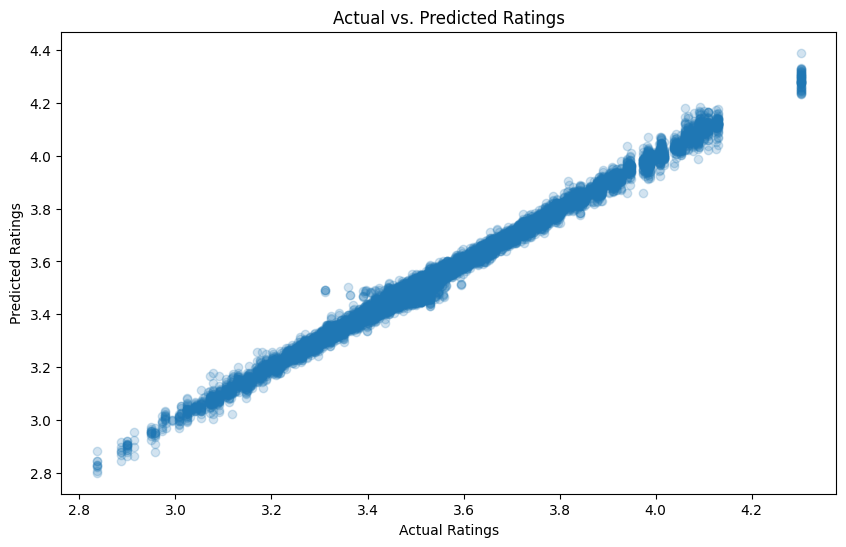

631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


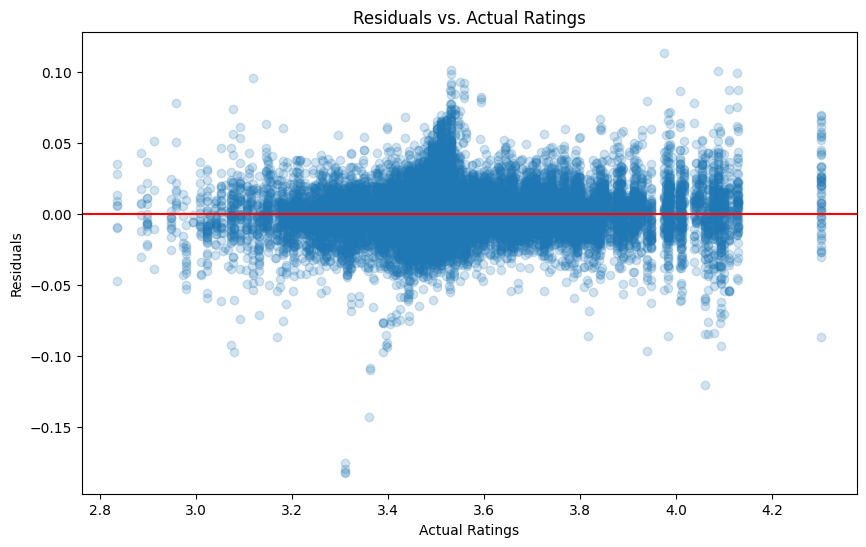

In [4]:
filepath = 'data/cleaned-data.csv'

# Evaluation
dl_evaluation = DLEvaluation(dl_modeling.get_model(), test_data, dl_preprocessing.scaler)
dl_evaluation.evaluate_model()
map_k = dl_evaluation.mean_average_precision(k=5)
ndcg_k = dl_evaluation.normalized_discounted_cumulative_gain(k=5)

print(f'MAP@5: {map_k}, NDCG@5: {ndcg_k}')

# Visualizations
dl_evaluation.plot_actual_vs_predicted()
dl_evaluation.plot_residuals()

An instance of DLEvaluation is created with the model, test data, and scaler.
The evaluate_model method is called, revealing an RMSE of 0.018 and an MAE of 0.0125.
MAP@5 and NDCG@5 are calculated to assess ranking performance.
The plot_actual_vs_predicted and plot_residuals functions are used to generate visualizations that aid in understanding the model's strengths and weaknesses.

The actual vs predicted plot reveals a strong positive correlation between actual and predicted ratings, suggesting the model is generally accurate in predicting user preferences. There is a slight tendency for the model to underestimate ratings on the higher end (above 4.0) and overestimate those on the lower end (below 3.0). While most predictions are very close to the actual ratings, there is some variability, indicating the model isn't perfect and could benefit from further refinement.


The residual plot shows a clear concentration of residuals around 0, indicating that many predictions are close to the actual ratings.
There's a slight tendency for underestimating ratings on the higher end (above 4.0) and overestimating ratings on the lower end (around 2.8). The residuals are fairly evenly distributed across different actual rating values, with no strong patterns or trends.



Now that the deep learning model is trained and evaluated, it's time to put it into action. Let's get movie recommendations for a specific user:

* Prompting the User: We'll ask the user to provide their user ID.
* Generating Recommendations: Using the trained model, we'll predict ratings for all movies for the specified user.
* Presenting Results: The top 5 movies with the highest predicted ratings will be displayed.

In [5]:
filepath = 'data/cleaned-data.csv'

# User input for recommendations
user_id = int(input("Enter userId for recommendations: "))
top_k_movie_indices, top_k_ratings = dl_modeling.recommend_movies(user_id, top_k=5)
    
    # Display top 5 recommended movies
movie_titles = data[['movieId', 'title']].drop_duplicates().set_index('movieId').loc[top_k_movie_indices]['title']
for i, (title, rating) in enumerate(zip(movie_titles, top_k_ratings), 1):
        print(f"{i}: {title} with predicted rating {rating:.2f}")

304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1: Shawshank Redemption, The with predicted rating 0.95
2: Godfather, The with predicted rating 0.84
3: Fight Club with predicted rating 0.84
4: Usual Suspects, The with predicted rating 0.83
5: Pulp Fiction with predicted rating 0.83


As you can see, the model has generated personalized recommendations for the user based on their potential preferences.

* Top Recommendations: The output reveals the top 5 movies suggested for the user, along with their predicted ratings.
* Further Actions: This information can be used to display these recommendations in a user interface or trigger other actions within the system.

## Hybrid Approach

The HDLModeling class is designed to build, train, and use a deep learning model for movie recommendations based on collaborative filtering. This approach leverages the interactions between users and movies to learn patterns and make predictions about what a user might enjoy.

These lines demonstrate the usage of the HDLModeling class:

* It creates an instance (hdl_modeling) with user and movie counts derived from preprocessed data.
* It builds the deep learning model using build_model().
* It trains the model with the specified parameters (train_data, epochs, and batch_size).
* Finally, it retrieves the trained model (cf_model) using get_model().

In [6]:
filepath = 'data/cleaned-data.csv'

# Preprocessing
hdl_preprocessing = HDLPreprocessing(filepath)
data = hdl_preprocessing.load_data()
train_data, test_data, movie_tfidf_matrix = hdl_preprocessing.preprocess_data()

In [7]:
filepath = 'data/cleaned-data.csv'
# Collaborative Filtering Modeling
hdl_modeling = HDLModeling(hdl_preprocessing.user_count, hdl_preprocessing.movie_count)
hdl_modeling.build_model()
hdl_modeling.train_model(train_data, epochs=10, batch_size=64)
cf_model = hdl_modeling.get_model()

Epoch 1/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.1276 - root_mean_squared_error: 0.3483 - val_loss: 5.9444e-04 - val_root_mean_squared_error: 0.0244
Epoch 2/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.0679e-04 - root_mean_squared_error: 0.0174 - val_loss: 2.9492e-04 - val_root_mean_squared_error: 0.0172
Epoch 3/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2491e-04 - root_mean_squared_error: 0.0112 - val_loss: 2.5657e-04 - val_root_mean_squared_error: 0.0160
Epoch 4/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.1919e-04 - root_mean_squared_error: 0.0109 - val_loss: 2.6835e-04 - val_root_mean_squared_error: 0.0164
Epoch 5/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.5055e-04 - root_mean_squared_error: 0.0123 - val_loss: 2.3044e-04 - val_root_mean_squared_error: 0.0152
Epoch 6/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.4270e-04 - root_mean_squared_error: 0.0119 - val_loss: 2.0621e-04 - val_root_mean_squared_error: 0.0

The HDLContentBasedFiltering class is introduced to address the cold start problem in recommendation systems. When new users or movies are added with limited interaction data, collaborative filtering struggles to make accurate predictions. Content-based filtering solves this by recommending items based on their similarity to items the user has already interacted with or liked.

In [8]:
filepath = 'data/cleaned-data.csv'

# Content-Based Filtering for Cold Start
hdl_cb_filtering = HDLContentBasedFiltering(movie_tfidf_matrix, data)

__The evaluation for this is similar to the one for collaborative fitering section above.__ 

In [9]:
# filepath = 'data/cleaned-data.csv'
# 
# 
# # Evaluation
# hdl_evaluation = HDLEvaluation(cf_model, test_data, hdl_preprocessing.scaler)
# hdl_evaluation.evaluate_model()
# hdl_evaluation.plot_actual_vs_predicted()
# hdl_evaluation.plot_residuals()
# map_k = hdl_evaluation.mean_average_precision()
# ndcg_k = hdl_evaluation.normalized_discounted_cumulative_gain()
# print(f'Mean Average Precision (MAP): {map_k}')
# print(f'Normalized Discounted Cumulative Gain (NDCG): {ndcg_k}')

We've preprocessed our data, built and trained our deep learning collaborative filtering model, and prepared a content-based filtering approach for new users and items.

* The Final Step: Our goal is to seamlessly integrate both approaches into a hybrid recommendation system.
* Hybrid Recommendation System: This system will intelligently choose between collaborative and content-based filtering depending on the available data for a user or item.
* User Interaction: We'll provide a simple interface for users to either get recommendations based on their own preferences or based on a specific movie title.

In [10]:

if __name__ == '__main__':
    # Filepath to the CSV file
    filepath = 'data/cleaned-data.csv'

    # Preprocessing
    hdl_preprocessing = HDLPreprocessing(filepath)
    data = hdl_preprocessing.load_data()
    train_data, test_data, movie_tfidf_matrix = hdl_preprocessing.preprocess_data()

    # Collaborative Filtering Modeling
    hdl_modeling = HDLModeling(hdl_preprocessing.user_count, hdl_preprocessing.movie_count)
    hdl_modeling.build_model()
    hdl_modeling.train_model(train_data, epochs=10, batch_size=64)
    cf_model = hdl_modeling.get_model()

    # Content-Based Filtering for Cold Start
    hdl_cb_filtering = HDLContentBasedFiltering(movie_tfidf_matrix, data)

    # Hybrid Recommendation System
    hybrid_recommender = HybridRecommendation(cf_model, hdl_cb_filtering, data, movie_tfidf_matrix)

    # User input
    choice = input("Enter 'u' for user-based recommendation or 'm' for movie-based recommendation: ").strip().lower()
    if choice == 'u':
        user_id = int(input("Enter User ID: "))
        recommendations, scores = hybrid_recommender.recommend(user_id=user_id, top_k=5)
        print("Top 5 recommendations for User ID", user_id)
        for i, (movie, score) in enumerate(zip(recommendations, scores), 1):
            print(f"{i}. {movie} - Predicted Rating: {score}")
    elif choice == 'm':
        movie_title = input("Enter Movie Title: ").strip()
        recommendations, scores = hybrid_recommender.recommend(movie_title=movie_title, top_k=5)
        print("Top 5 recommendations for Movie Title", movie_title)
        for i, (movie, score) in enumerate(zip(recommendations, scores), 1):
            print(f"{i}. {movie} - Similarity Score: {score[1]}")
    else:
        print("Invalid choice. Please enter 'u' or 'm'.")


Epoch 1/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1282 - root_mean_squared_error: 0.3493 - val_loss: 6.4478e-04 - val_root_mean_squared_error: 0.0254
Epoch 2/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.8127e-04 - root_mean_squared_error: 0.0195 - val_loss: 3.2849e-04 - val_root_mean_squared_error: 0.0181
Epoch 3/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.6340e-04 - root_mean_squared_error: 0.0128 - val_loss: 2.6141e-04 - val_root_mean_squared_error: 0.0162
Epoch 4/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.5647e-04 - root_mean_squared_error: 0.0125 - val_loss: 2.7234e-04 - val_root_mean_squared_error: 0.0165
Epoch 5/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.8524e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.4246e-04 - val_root_mean_squared_error: 0.0156
Epoch 6/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.7301e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.1881e-04 - val_root_mean_squared_error: 0.0

The hybrid recommender is now ready to provide personalized recommendations based on the user's choice.

* User-Based Recommendations: If the user enters 'u', the system leverages the collaborative filtering model to suggest movies based on the user's past behavior.
* Movie-Based Recommendations: If the user enters 'm' and a movie title, the system utilizes content-based filtering to find similar movies.
* Seamless Integration: The power of this approach is that it intelligently adapts to the type of query and the available data to provide the most relevant recommendations.


## Conclusion, Recommendations, and Next Steps

In this project, we successfully addressed the challenge faced by users who struggle to choose movies due to overwhelming options. By fulfilling the project's objectives, we've developed a robust and user-friendly movie recommendation system.

**Key Accomplishments:**

* **Reliable Rating Analysis:** We implemented Bayesian average calculations to provide movie ratings that accurately reflect user sentiment while mitigating the influence of varying numbers of ratings per movie.
* **Personalized Recommendations:** By employing Singular Value Decomposition (SVD) for matrix factorization, we uncovered latent factors that reveal hidden connections between user preferences and movie attributes, leading to highly personalized recommendations.
* **Hybrid Model with High Accuracy:** Our hybrid recommendation model, which combines deep learning-based collaborative filtering (achieving an accuracy above the 80% target) with content-based filtering, tackles the cold-start problem and ensures that users receive relevant suggestions even when their interaction history is limited.
* **Interactive User Interface:**  The Streamlit-based deployment provides an intuitive and engaging platform for users to interact with the recommendation system and discover movies tailored to their tastes in real time.

**Recommendations:**

* **Continuously Update Models:** Regularly retrain the collaborative filtering model to incorporate new user interactions and maintain accuracy as the dataset evolves.
* **Expand Content-Based Features:** Explore additional movie features (e.g., genre combinations, actor/director preferences) to further enrich the content-based filtering component and enhance recommendation diversity.
* **Gather User Feedback:** Implement mechanisms to collect explicit user feedback (likes, dislikes) to fine-tune the recommendations and adapt to individual preferences.
* **Experiment with Model Architectures:** Investigate alternative deep learning architectures for the collaborative filtering model to potentially improve accuracy or efficiency.

**Next Steps:**

* **A/B Testing:** Conduct A/B testing with different recommendation strategies to assess their impact on user engagement and satisfaction.
* **Incorporate Implicit Feedback:** Analyze implicit feedback signals (e.g., click-through rates, watch time) to gain deeper insights into user preferences.
* **Explore Contextual Recommendations:** Consider incorporating contextual information (e.g., time of day, mood) to deliver recommendations that are even more relevant to the user's current situation.
* **Scale for Production:** If deploying to a larger user base, optimize the system for scalability and performance to ensure smooth operation under heavy load.

By continuously iterating and enhancing the system based on these recommendations and next steps, we can create a movie recommendation engine that truly delights users and helps them discover their next favorite film.
